<a href="https://colab.research.google.com/github/girilang/COMP9414-Tutorials/blob/main/Tutorial_Week_5_Simulated_Annealing_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Intelligence - COMP9414 23T2
###Tutorial week 5 - Metaheuritics - Part 2

Simulated annealing

@Author: __Francisco Cruz__



##Challenge:

The eggholder function is a test function used in optimisation.
It allows testing optimiser algorithms as it has multiple local minima. The function is defined in a search domain $-512 \leq x,y \leq 512$ as follows:

\begin{equation}
    f(x,y) = -(y+47) \sin{\sqrt{\bigg|\frac{x}{2} + (y+47)\bigg|}} -
    x \sin{\sqrt{\big|x-(y+47)\big|}}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

__Section 3.f.1.__ Create a fitness function that receives $x$ and $y$ and returns the eggholder value function.

In [2]:
#Section 3.f.1
def eggHolder(x,y):
    return -(y + 47)*np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y+47))))

__Section 3.f.2.__ Plot the surface function.

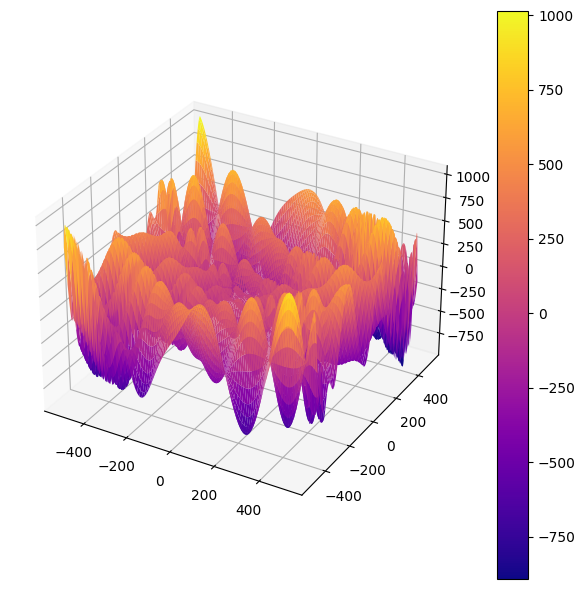

In [3]:
#Section 3.f.2
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1,projection='3d')
xvalues = np.linspace(-512,512,500)
yvalues = np.linspace(-512,512,500)
xgrid, ygrid = np.meshgrid(xvalues, yvalues)
zvalues = eggHolder(xgrid,ygrid)

surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
fig.colorbar(surf, aspect=18)
plt.tight_layout()
plt.show()


__Section 3.f.3.__ Adapt the previous simulated annealing code to work with the new fitness function (i.e., accepting $x, y$ inputs).

__Section 3.f.4.__ Adapt how the initial and the neighbour solutions are generated (consider the step-size for the neighbour solution).

__Section 3.f.5.__ Evaluate only valid neighbour solutions, i.e., immediately discard solutions out of the variable limits.


In [4]:
#Section 3.f.3
def simulatedAnnealing(initialT, alpha, nIter, finalT):
    temp = initialT
    #generate initial solution
    #Section 3.f.4
    currentSolution = np.random.randn(1,2) * 256
    bestSolution = currentSolution

    solutions = currentSolution
    temperatures = np.array([])
    temperatures = np.append(temperatures, initialT)

    while temp >= finalT:
        for i in range(nIter):
            while True:
                #Section 3.f.4
                neighbourSolution = currentSolution + np.random.randn()*10
                if neighbourSolution[0][0] >= -512 and neighbourSolution[0][0] <= 512:
                    if neighbourSolution[0][1] >= -512 and neighbourSolution[0][1] <= 512:
                        #Section 3.f.5
                        break

            delta = eggHolder(neighbourSolution[0][0], neighbourSolution[0][1]) - eggHolder(currentSolution[0][0], currentSolution[0][1])
            metropolis = np.exp(-delta / temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if eggHolder(currentSolution[0][0], currentSolution[0][1]) < eggHolder(bestSolution[0][0], bestSolution[0][1]):
                    bestSolution = currentSolution

        temp = alpha * temp

        solutions = np.append(solutions, currentSolution, axis=0)
        temperatures = np.append(temperatures, temp)

    return bestSolution, solutions, temperatures

__Section 3.f.6.__ Run the simulated annealing algorithm to find the best possible solution. Modify as many parameters as needed.

__Hint:__ the optimal minimum is $f(512, 404.2319) = -959.6406627106155$.

In [5]:
#From section 2.c
np.random.seed(448)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

best, solutions, temperatures = simulatedAnnealing(initialT, alpha, nIter, finalT)
print('Returned solution: f(%s) = %f' % (best, eggHolder(best[0][0], best[0][1])))

Returned solution: f([[419.40581556 170.63030558]]) = -629.221348


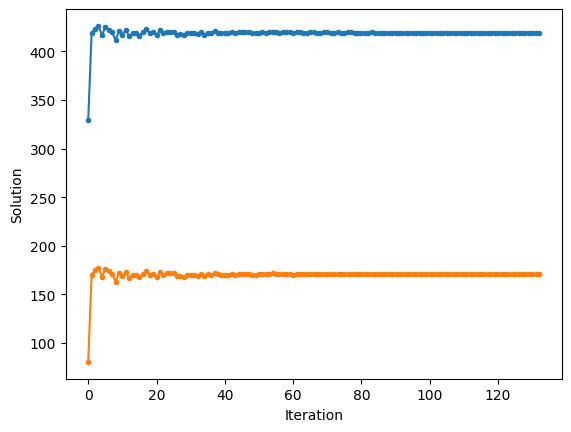

266


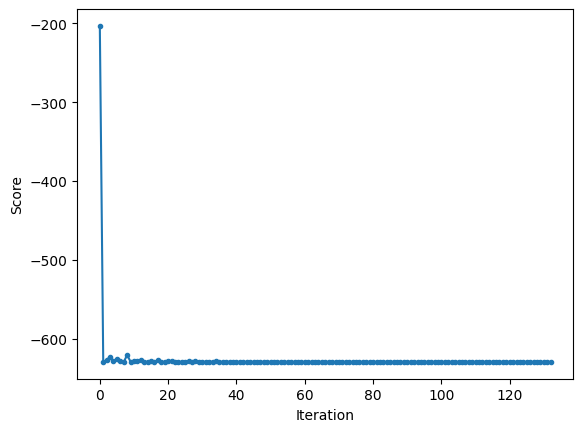

In [6]:
#Plotting the solutions
plt.plot(solutions, ".-")
plt.xlabel("Iteration")
plt.ylabel("Solution")
plt.show()

#Plotting the scores
print(np.size(solutions))
scores = eggHolder(solutions[:,0], solutions[:,1])
plt.plot(scores, ".-")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()


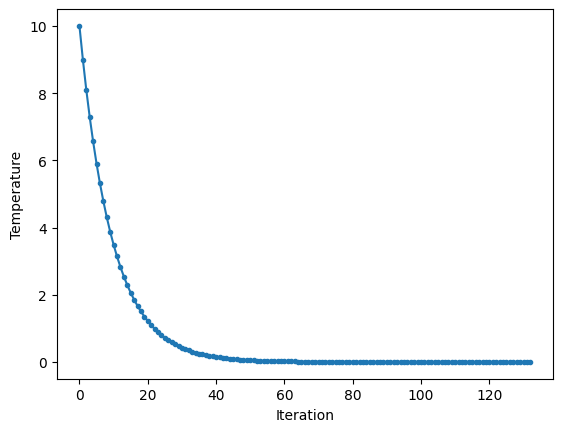

In [7]:
plt.plot(temperatures, ".-")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.show()